## Working with code

In [1]:
# Imports
import numpy as np # the most popular Python library for array manipulation and numeric computing
import matplotlib.pyplot as plt # the most populat visualization library in the Python ecosystem

%matplotlib inline

Let's execute a few lines of code and generate some plots:

In [10]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

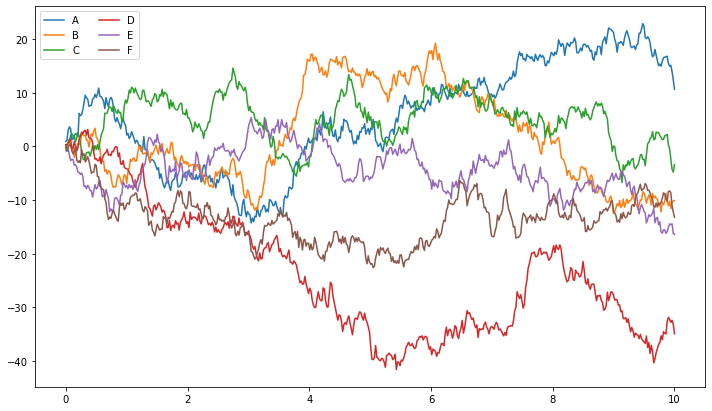

In [11]:
plt.figure(figsize=(12,7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Interacting with data

To pull cryptocurrencies prices from public API and Download them as excel files. 
Libraries necessary: 
- requests (to pull data from the web)
- pandas (to process it)

In [12]:
import requests
import pandas as pd

In [14]:
# A predefinid function that simplifies the process of importing data from Cryptowatch (https://cryptowat.ch/)

def get_historic_price(symbol, exchange='bitfinex', after='2019-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

### - Pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [16]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-01-21 11:37:06.897036')

In [19]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [20]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin:

In [27]:
# 172 = count
# 24 = hours
172 / 24 # result=dias

7.166666666666667

In [26]:
# 7 days of data 
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02
mean,32069.056221,32367.357500,31724.954767,32061.254709,543.323680,1.719934e+07
std,929.513058,868.782544,979.782847,924.625124,449.347278,1.373117e+07
min,29477.890000,30188.630000,28800.000000,29477.890000,67.542690,2.203225e+06
25%,31512.145000,31866.367500,31172.250000,31514.765000,214.492023,7.098189e+06
50%,32061.565000,32362.665000,31791.540000,32025.270000,423.155450,1.330715e+07
75%,32667.552500,32871.065000,32255.837500,32613.940000,683.021137,2.202297e+07
max,34572.610000,34888.000000,34362.070000,34572.610000,2546.430971,7.581703e+07


In [21]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-01-21 12:00:00,32821.99,32988.92,32150.00,32189.24,648.958892,2.111908e+07
2021-01-21 13:00:00,32167.27,32683.21,31283.87,32474.03,1976.463750,6.320947e+07
2021-01-21 14:00:00,32470.57,32753.72,32162.03,32282.00,912.729624,2.963565e+07
2021-01-21 15:00:00,32270.36,32425.19,30969.00,31100.00,2111.927283,6.660051e+07
2021-01-21 16:00:00,31070.17,32054.24,30990.86,31335.89,1334.486475,4.206096e+07


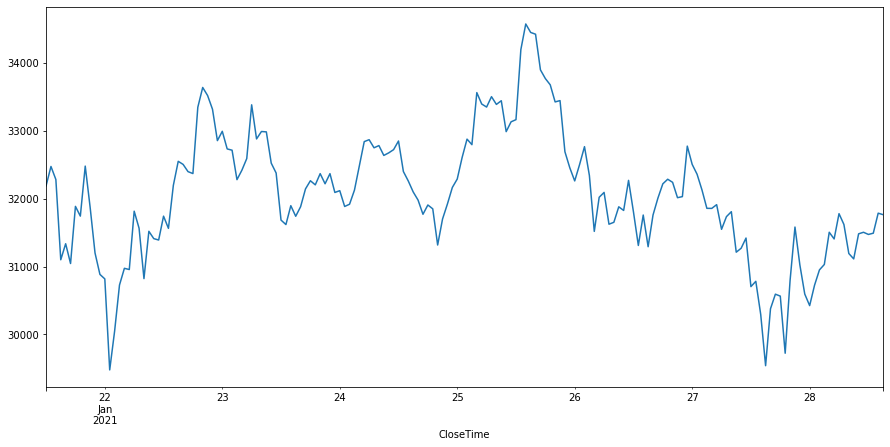

In [22]:
btc['ClosePrice'].plot(figsize=(15,7))

### Ether:

In [23]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-01-21 12:00:00,1248.30,1256.24,1233.14,1235.13,4448.887130,5.552883e+06
2021-01-21 13:00:00,1235.13,1252.04,1188.02,1243.47,9794.133480,1.191177e+07
2021-01-21 14:00:00,1241.37,1260.00,1231.94,1236.45,4669.239521,5.833317e+06
2021-01-21 15:00:00,1236.01,1243.79,1192.86,1201.57,6524.801510,7.933277e+06
2021-01-21 16:00:00,1202.99,1230.57,1182.45,1187.62,7646.123066,9.212149e+06


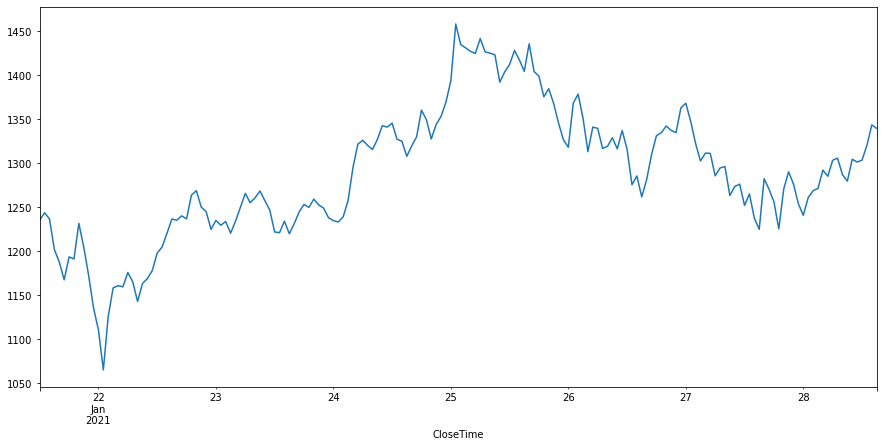

In [24]:
eth['ClosePrice'].plot(figsize=(15,7))

### Dynamic plots with Bokeh

In [28]:
# Imports
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [29]:
output_notebook()

Loading BokehJS ...

In [35]:
# plot
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"
show(p1)

## Exporting to Excel 

Working with Excel and other formats (like CSV or JSON).
The first  step will be create an "Excel writer", a component from the pandas package: 

In [36]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separete sheets:

In [37]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [38]:
eth.to_excel(writer, sheet_name='Ether')

In [39]:
# And finally, we can save the file:
writer.save()

# End